In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IMPORT NECESSARY LIBRARIES



In [19]:
pip install --upgrade pip setuptools wheel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.1 MB/s eta 0:00:00
  Using cached setuptools-70.1.1-py3-none-any.whl (883 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [3]:
!pip install cython
!pip install pystan==2.19.1.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 70.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp310-cp310-linux_x86_64.whl size=61975261 sha256=c7012933724a32745d16458d4409428952219eac89b43e80a362c9bea09adda0
  Stored in directory: /root/.cache/pip/wheels/3d/1c/94/4516243362eedbedad15ac4389691ee3bf2d45bec2639c9d8b
Successfully built pystan


In [4]:
pip install prophet

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from prophet import Prophet
# from fbprophet.plot import plot_plotly

# import plotly.graph_objects as go
# import plotly.figure_factory as ff

In [9]:
import plotly.io as pio
pio.renderers.default = 'colab'

IMPORTING DATASET AND EXPLORING IT

In [10]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/DS/TSLA.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-27,243.240005,250.389999,240.850006,250.210007,250.210007,164968200
1,2023-06-28,249.699997,259.880005,248.889999,256.239990,256.239990,159770800
2,2023-06-29,258.029999,260.739990,253.610001,257.500000,257.500000,131283400
3,2023-06-30,260.600006,264.450012,259.890015,261.769989,261.769989,112267600
4,2023-07-03,276.489990,284.250000,275.109985,279.820007,279.820007,119685900


In [11]:
data.shape

(252, 7)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [13]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,217.201389,221.188135,213.043135,217.120079,217.120079,1.074786e+08
std,37.228581,37.631150,36.650794,37.178878,37.178878,2.653010e+07
min,140.559998,144.440002,138.800003,142.050003,142.050003,5.086970e+07
25%,181.950001,184.504997,176.979999,180.004998,180.004998,9.007905e+07
50%,218.379998,223.305000,213.235001,219.055000,219.055000,1.071200e+08
75%,250.057503,254.777504,244.574997,250.427502,250.427502,1.220633e+08
max,296.040009,299.290009,289.519989,293.339996,293.339996,2.438697e+08


DATA VISUALIZATION USING PLOTLY

In [14]:
px.area(data, x='Date', y='Close')

In [15]:
px.line(data, x='Date', y='Close')

In [16]:
px.area(data, x='Date', y='Volume')

In [17]:
px.bar(data,y='Volume')

In [18]:
px.box(data, y = 'Volume')

In [19]:
cols = ['Date', 'Close']
df = pd.DataFrame(data, columns=cols)
df

,Date,Close
0,2023-06-27,250.210007
1,2023-06-28,256.239990
2,2023-06-29,257.500000
3,2023-06-30,261.769989
4,2023-07-03,279.820007
...,...,...
247,2024-06-20,181.570007
248,2024-06-21,183.009995
249,2024-06-24,182.580002
250,2024-06-25,187.350006


In [20]:
prophet_df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_df

,ds,y
0,2023-06-27,250.210007
1,2023-06-28,256.239990
2,2023-06-29,257.500000
3,2023-06-30,261.769989
4,2023-07-03,279.820007
...,...,...
247,2024-06-20,181.570007
248,2024-06-21,183.009995
249,2024-06-24,182.580002
250,2024-06-25,187.350006


In [21]:
m= Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9hqvc5cc/0s1wx7c4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9hqvc5cc/c_c9wnbu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63781', 'data', 'file=/tmp/tmp9hqvc5cc/0s1wx7c4.json', 'init=/tmp/tmp9hqvc5cc/c_c9wnbu.json', 'output', 'file=/tmp/tmp9hqvc5cc/prophet_model1r0kibtl/prophet_model-20240627055434.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:54:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:54:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [25]:
future = m.make_future_dataframe(periods=30)

In [26]:
future

,ds
0,2023-06-27
1,2023-06-28
2,2023-06-29
3,2023-06-30
4,2023-07-03
...,...
277,2024-07-22
278,2024-07-23
279,2024-07-24
280,2024-07-25


In [27]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-06-27,263.987223,248.584535,286.017325,263.987223,263.987223,4.089297,4.089297,4.089297,4.089297,4.089297,4.089297,0.0,0.0,0.0,268.076519
1,2023-06-28,263.769696,248.587151,286.223459,263.769696,263.769696,3.923593,3.923593,3.923593,3.923593,3.923593,3.923593,0.0,0.0,0.0,267.693290
2,2023-06-29,263.552170,246.059293,282.575955,263.552170,263.552170,2.178502,2.178502,2.178502,2.178502,2.178502,2.178502,0.0,0.0,0.0,265.730672
3,2023-06-30,263.334643,244.370956,284.163902,263.334643,263.334643,1.397791,1.397791,1.397791,1.397791,1.397791,1.397791,0.0,0.0,0.0,264.732435
4,2023-07-03,262.682064,246.094257,283.129801,262.682064,262.682064,2.596004,2.596004,2.596004,2.596004,2.596004,2.596004,0.0,0.0,0.0,265.278068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2024-07-22,175.801533,159.316079,198.643793,174.815933,176.957529,2.596004,2.596004,2.596004,2.596004,2.596004,2.596004,0.0,0.0,0.0,178.397537
278,2024-07-23,175.866711,159.990532,197.521111,174.840305,177.114796,4.089297,4.089297,4.089297,4.089297,4.089297,4.089297,0.0,0.0,0.0,179.956008
279,2024-07-24,175.931889,160.971777,199.078010,174.847616,177.251525,3.923593,3.923593,3.923593,3.923593,3.923593,3.923593,0.0,0.0,0.0,179.855483
280,2024-07-25,175.997067,158.106935,197.701726,174.835237,177.406261,2.178502,2.178502,2.178502,2.178502,2.178502,2.178502,0.0,0.0,0.0,178.175569


In [28]:
px.line(forecast, x='ds', y='yhat')

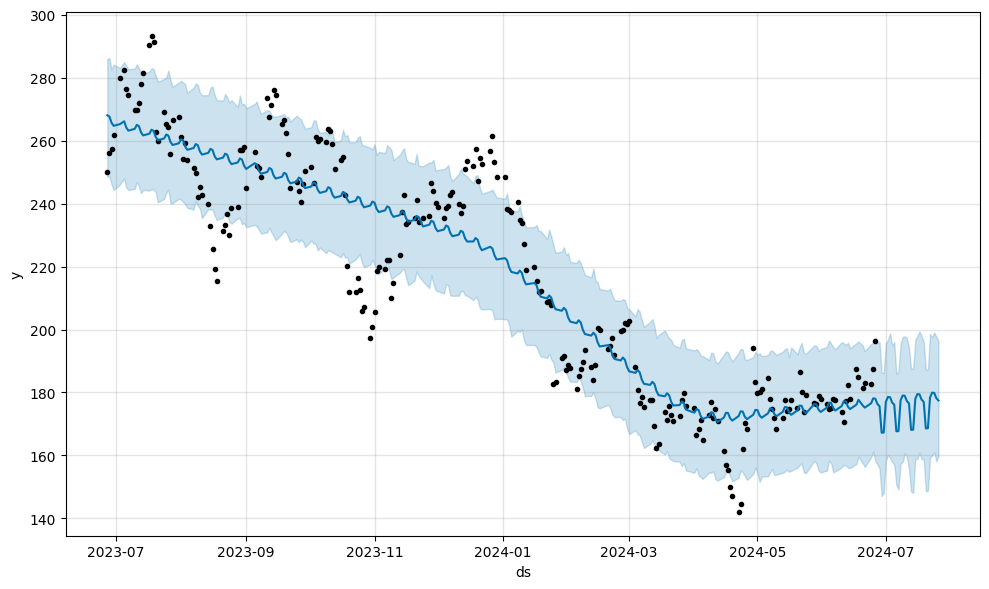

In [29]:
figure = m.plot(forecast, xlabel = "ds", ylabel = "y")
figure.show()

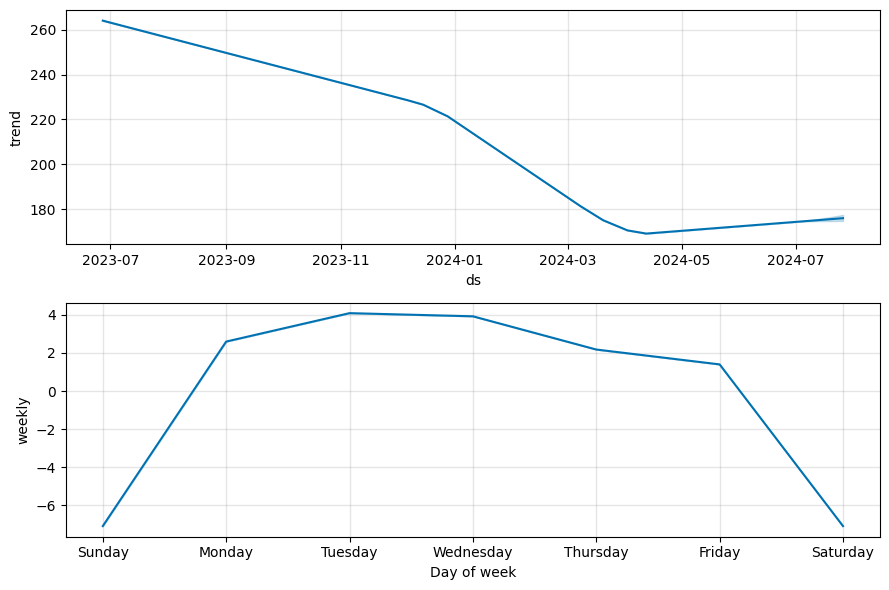

In [31]:
fig2 = m.plot_components(forecast)

In [33]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>